<a href="https://colab.research.google.com/github/albertofernandezvillan/ml-dl-cv-notebooks/blob/main/roc_curves_and_auc_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ROC Curves And AUC with scikit-learn

See also this notebook: "[Metrics for classification in scikit-learn](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/pandas_and_scikit_learn_introduction.ipynb"), which introduces all the metrics for classifiction. In this notebook, only ROC and AUC are considered.









In [1]:
# Import all the packages required for this notebook
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import plotly.express as px
import pandas as pd

# Making the dataset

See this link in order to see more options and examples in connection with the generation of classification datasets (https://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html).

In [2]:
# Make a random classification dataset
# X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=1)
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

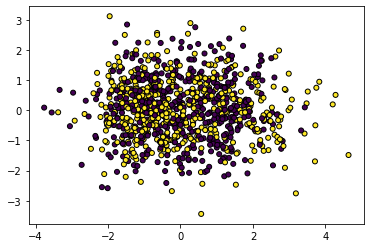

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

# Fiting some models

In [4]:
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X, y)

linear_svc_model = LinearSVC(max_iter=2000)
linear_svc_model.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=2000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

# Getting the predictions

In [5]:
# Get the probabilities for the first element of our dataset:
# a) get the probability of the first element to be classified as 0:
pred_1 = logistic_reg_model.predict_proba(X)[0,0]
# b) get the probability of the first elemento to be classified as 1:
pred_2 = logistic_reg_model.predict_proba(X)[0,1]

# Print the predictions. We show that the sum of both predictions is 1:
print(pred_1)
print(pred_2)
print(pred_1 + pred_2)

0.20227940350195805
0.797720596498042
1.0


In [6]:
# Get all the probabilities to classify each element of the dataset as 1 (i.e. having the condition)
preds_log_reg = logistic_reg_model.predict_proba(X)[:,1]
preds_lin_svc = linear_svc_model._predict_proba_lr(X)[:,1]

# Showing the ROC curves and AUC

In [7]:
fpr_1, tpr_1, thresh_1 = roc_curve(y, preds_log_reg)
fpr_2, tpr_2, thresh_2 = roc_curve(y, preds_lin_svc)

roc_df_1 = pd.DataFrame(zip(fpr_1, tpr_1, thresh_1),columns = ["FPR","TPR","Threshold"])
roc_df_2 = pd.DataFrame(zip(fpr_2, tpr_2, thresh_2),columns = ["FPR","TPR","Threshold"])

roc_df_2

,FPR,TPR,Threshold
0,0.000000,0.000000,1.938665
1,0.000000,0.002004,0.938665
2,0.000000,0.146293,0.796470
3,0.001996,0.146293,0.795341
4,0.001996,0.158317,0.791187
...,...,...,...
215,0.862275,0.995992,0.185152
216,0.862275,0.997996,0.184823
217,0.950100,0.997996,0.131821
218,0.950100,1.000000,0.131444


In [8]:
fig = px.area(roc_df_1, x="FPR", y="TPR", hover_data = ["Threshold"])
fig.show()

In [9]:
fig = px.area(roc_df_2, x="FPR", y="TPR", hover_data = ["Threshold"])
fig.show()

The AUC is the area under the ROC Curve:

In [10]:
print(roc_auc_score(y, preds_log_reg))
print(roc_auc_score(y, preds_lin_svc))

0.9246156984627939
0.9243356973427894


# Exploring plotly.express

In [11]:
fig = px.area(roc_df_1, x="FPR", y="TPR", hover_data = ["Threshold"])
fig.show()

In [12]:
fig = px.area(roc_df_1, x="FPR", y="TPR", hover_data = ["Threshold"])

text = roc_auc_score(y, preds_log_reg)
fig.add_annotation(x=0.5, y=0.5, text=f"AUC={text:2f}", showarrow=False)

fig.show()

In [17]:
fig = px.area(roc_df_1, x="FPR", y="TPR", hover_data = ["Threshold"])

showarrow=True
INTERVAL = 25
for i in range(len(roc_df_1)):
  if i%INTERVAL==0:
    _x = roc_df_1.iloc[i, 0]
    _y = roc_df_1.iloc[i, 1] 
    text = roc_df_1.iloc[i,2]
    fig.add_annotation(x=_x, y=_y, text=f"thresh = {text:.2f}", showarrow=showarrow)


showarrow = False
text = roc_auc_score(y, preds_log_reg)
fig.add_annotation(x=0.5, y=0.5, text=f"AUC={text:2f}", showarrow=showarrow)

fig.show()